<a href="https://colab.research.google.com/github/manasvipaturu/FDA/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("CAERS_ProductBased.csv") #load the FDA data
data

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,Unnamed: 12
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,NaN
1,6/30/2023,2023-CFS-006720,NaN,SUSPECT,ONE A DAY WOMEN'S,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,Suicidal ideation,Other Serious Outcome,NaN
2,6/30/2023,2023-CFS-006718,6/22/2023,SUSPECT,RITUAL ESSENTIAL PRENATAL MULTIVITAMIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,Chest pain,"Hospitalization, Other Serious or Important Me...",NaN
3,6/30/2023,2023-CFS-006717,NaN,SUSPECT,METAMUCIL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),46.0,year(s),Female,"Pain, Vomiting","Hospitalization, Other Serious or Important Me...",NaN
4,6/30/2023,2023-CFS-006714,NaN,SUSPECT,NATURE'S BOUNTY CALCIUM 1200MG PLUS 25MCG (100...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Nephrolithiasis, Renal injury","Hospitalization, Visited Emergency Room, Other...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206601,12/23/1999,100748,8/20/1999,SUSPECT,GERO VITA ARTHRO 7,54,Vit/Min/Prot/Unconv Diet(Human/Animal),65.0,year(s),Male,"BLINDNESS, DECREASED IMMUNE RESPONSIVENESS, HE...","Required Intervention, Visited a Health Care P...",NaN
206602,5/13/1999,100920,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HEART RATE INCREASED, SYNCOPE",Hospitalization,NaN
206603,5/13/1999,100919,NaN,SUSPECT,AM-300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"DIZZINESS, FEELING ABNORMAL","Hospitalization, Visited Emergency Room",NaN
206604,5/13/1999,100918,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HYPERVENTILATION, PALPITATIONS","Hospitalization, Visited Emergency Room",NaN


**Exploratory Data Analysis**

In [ ]:
# Analyze column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206606 entries, 0 to 206605
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DATE_FDA_FIRST_RECEIVED_REPORT  206606 non-null  object 
 1   REPORT_ID                       206606 non-null  object 
 2   DATE_EVENT                      142088 non-null  object 
 3   PRODUCT_TYPE                    206606 non-null  object 
 4   PRODUCT                         206605 non-null  object 
 5   PRODUCT_CODE                    206606 non-null  object 
 6   DESCRIPTION                     206606 non-null  object 
 7   PATIENT_AGE                     138729 non-null  float64
 8   AGE_UNITS                       138729 non-null  object 
 9   SEX                             197296 non-null  object 
 10  CASE_MEDDRA_PREFERRED_TERMS     206606 non-null  object 
 11  CASE_OUTCOME                    206606 non-null  object 
 12  Unnamed: 12     

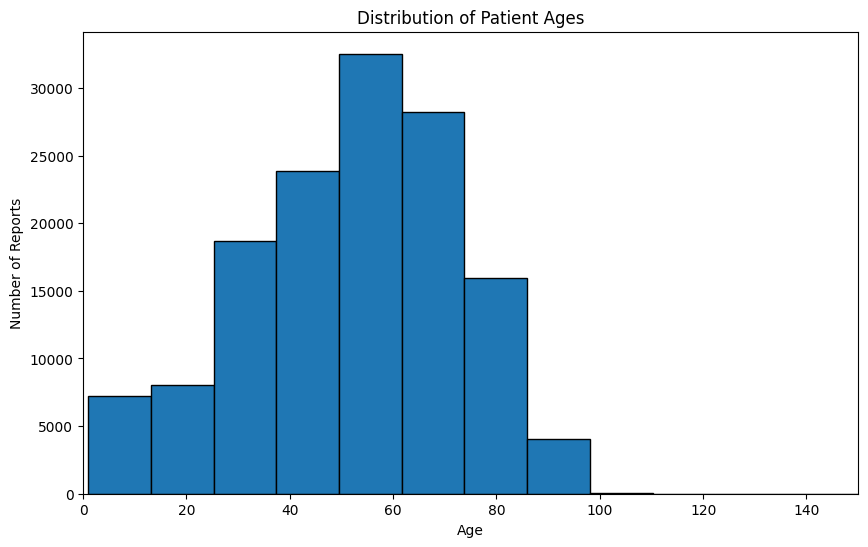

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['PATIENT_AGE'], bins=30, edgecolor='black')
plt.xlim(0,150)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Number of Reports')
plt.show()

In [ ]:
# Output the most common product codes that lead to adverse reactions
# Product code = 53 and 54 are most common in the data
data['PRODUCT_CODE'].value_counts()

54     84651
53     78051
23      5428
29      3330
3       3309
24      2911
16      2831
5       2281
41      2233
9       1884
20      1644
25      1578
37      1523
7       1426
40      1408
31      1152
13      1071
21      1067
33      1042
34       967
40P      592
39       564
12       512
45       508
2        484
28       448
27       406
15       377
38       340
22       328
36       317
14       312
17       306
4        258
30       199
41G      176
26       162
18       123
35       121
32        63
52        50
46        49
40N       41
50        38
40C       14
51        14
40O       10
40M        7
Name: PRODUCT_CODE, dtype: int64

In [ ]:
#We see that Exemption 4 (which is not disclosed), Vitamin D, Multivitamins and etc are most common in the data
data['PRODUCT'].value_counts()

EXEMPTION 4                                       66370
SUPER BETA PROSTATE                                1109
VITAMIN D                                           950
MULTIVITAMIN                                        775
FISH OIL                                            751
                                                  ...  
JOINT & MUSCLE FREEDOM                                1
Mushroom capsules                                     1
CHICKEN TANDOORI AND SPINACH MICROWAVABLE MEAL        1
ACTIVE HYDRATION SERUM                                1
AM-300                                                1
Name: PRODUCT, Length: 72707, dtype: int64

**Data Preprocessing**

In [ ]:
# MISSING VALUES

#find number of missing values from each column
missing_data = data.isna().sum()
missing_data

DATE_FDA_FIRST_RECEIVED_REPORT         0
REPORT_ID                              0
DATE_EVENT                         64518
PRODUCT_TYPE                           0
PRODUCT                                1
PRODUCT_CODE                           0
DESCRIPTION                            0
PATIENT_AGE                        67877
AGE_UNITS                          67877
SEX                                 9310
CASE_MEDDRA_PREFERRED_TERMS            0
CASE_OUTCOME                           0
Unnamed: 12                       206606
dtype: int64

In [ ]:
#calculate missing values percentages
data_na = (data.isna().sum()/len(data))*100
data_na = data_na.drop(data_na[data.isna().sum() == 0].index)
data_na_ratio = pd.DataFrame({'Missing Ratio' :data_na})
data_na_ratio

,Missing Ratio
DATE_EVENT,31.227554
PRODUCT,0.000484
PATIENT_AGE,32.853354
AGE_UNITS,32.853354
SEX,4.506161
Unnamed: 12,100.000000


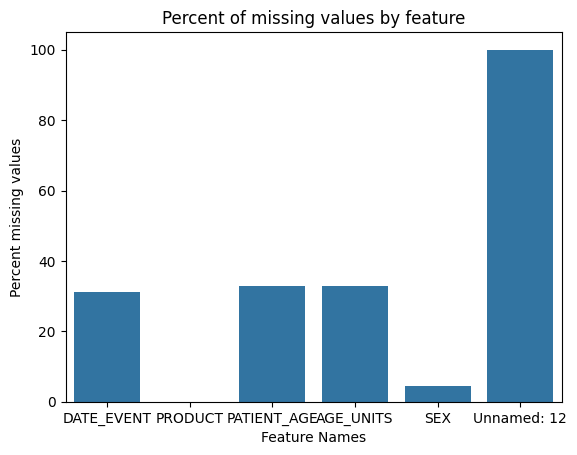

In [ ]:
sns.barplot(x = data_na.index, y = data_na)
plt.xlabel('Feature Names')
plt.ylabel('Percent missing values')
plt.title('Percent of missing values by feature');

In [ ]:
data[data['AGE_UNITS'].isna()]
#looking at this subset of the data, we see that rows missing AGE_UNITS are also missing data in PATIENT_AGE, SEX, and DATE_EVENT

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,Unnamed: 12
1,6/30/2023,2023-CFS-006720,NaN,SUSPECT,ONE A DAY WOMEN'S,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,Suicidal ideation,Other Serious Outcome,NaN
2,6/30/2023,2023-CFS-006718,6/22/2023,SUSPECT,RITUAL ESSENTIAL PRENATAL MULTIVITAMIN,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,Chest pain,"Hospitalization, Other Serious or Important Me...",NaN
4,6/30/2023,2023-CFS-006714,NaN,SUSPECT,NATURE'S BOUNTY CALCIUM 1200MG PLUS 25MCG (100...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Nephrolithiasis, Renal injury","Hospitalization, Visited Emergency Room, Other...",NaN
9,6/29/2023,2023-CFS-006677,6/20/2023,SUSPECT,MACUHEALTH PLUS,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Constipation, Haemorrhoids","Other Serious or Important Medical Event, Visi...",NaN
21,6/28/2023,2023-CFS-006663,NaN,SUSPECT,CORN DERIVED PRODUCTS,2,Whole Grain/Milled Grain Prod/Starch,NaN,NaN,NaN,"Burning sensation, Diarrhoea, Eczema, Hypersen...","Life Threatening, Disability, Other Serious or...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206600,12/29/2000,83787,NaN,SUSPECT,R.W. KNUDSEN NATURAL PASTEURIZED APPLE JUICE,20,Fruit/Fruit Prod,NaN,NaN,Female,"BURNING SENSATION, NAUSEA, THROAT IRRITATION","Visited Emergency Room, Visited a Health Care ...",NaN
206602,5/13/1999,100920,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HEART RATE INCREASED, SYNCOPE",Hospitalization,NaN
206603,5/13/1999,100919,NaN,SUSPECT,AM-300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"DIZZINESS, FEELING ABNORMAL","Hospitalization, Visited Emergency Room",NaN
206604,5/13/1999,100918,NaN,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HYPERVENTILATION, PALPITATIONS","Hospitalization, Visited Emergency Room",NaN


In [ ]:
#decide to drop column 'Unnamed: 12' because entire column has missing values
data.drop(columns = 'Unnamed: 12', inplace = True)

#decide to drop all rows because we are using demographic data for modeling and we cannot extrapolate demographic data
data.dropna(inplace = True)

**Feature Engineering**

In [ ]:
data['CASE_OUTCOME'].value_counts()

Other Serious or Important Medical Event                                                    33087
Other Outcome                                                                               13301
Death                                                                                        9065
Hospitalization, Other Serious or Important Medical Event                                    7784
Death, Other Serious or Important Medical Event                                              5921
                                                                                            ...  
Death, Life Threatening, Visited Emergency Room, Visited a Health Care Provider                 1
Death, Life Threatening, Hospitalization, Disability, Visited Emergency Room                    1
Death, Hospitalization, Disability, Visited a Health Care Provider                              1
Death, Congenital Anomaly, Visited Emergency Room                                               1
Life Threatening, Ho

In [ ]:
#We can see that the 'CASE_OUTCOME' column had high variability. For modeling, we decided to engineer features in a new column called 'CASE_OUTCOME'.
#'5' signifies the highest medical risk (death) and '1' signifies low medical risk
data['CLASSIFICATION'] = data['CASE_OUTCOME']

# 5
data.loc[data['CLASSIFICATION'].str.contains('Death', case=False, na=False), 'CLASSIFICATION'] = 5

# 4
data.loc[data['CLASSIFICATION'].str.contains('Serious', case=False, na=False), 'CLASSIFICATION'] = 4
data.loc[data['CLASSIFICATION'].str.contains('Hospitalization', case=False, na=False), 'CLASSIFICATION'] = 4

# 3 - Hospitalization, Disability
data.loc[data['CLASSIFICATION'].str.contains('Intervention', case=False, na=False), 'CLASSIFICATION'] = 3

# 2 - Serious, Life Threatening
data.loc[data['CLASSIFICATION'].str.contains('Emergency', case=False, na=False), 'CLASSIFICATION'] = 2
data.loc[data['CLASSIFICATION'].str.contains('Life Threatening', case=False, na=False), 'CLASSIFICATION'] = 2
data.loc[data['CLASSIFICATION'].str.contains('Injury', case=False, na=False), 'CLASSIFICATION'] = 2
data.loc[data['CLASSIFICATION'].str.contains('Health Care Provider', case=False, na=False), 'CLASSIFICATION'] = 2
data.loc[data['CLASSIFICATION'].str.contains('Other', case=False, na=False), 'CLASSIFICATION'] = 2
data.loc[data['CLASSIFICATION'].str.contains('Disability', case=False, na=False), 'CLASSIFICATION'] = 2

# 1 - Allergic, Other
data.loc[data['CLASSIFICATION'].str.contains('Congenital Anomaly', case=False, na=False), 'CLASSIFICATION'] = 1
data.loc[data['CLASSIFICATION'].str.contains('Allergic', case=False, na=False), 'CLASSIFICATION'] = 1

data['CLASSIFICATION'].value_counts()

4    70507
2    22783
5    17276
3      988
1       40
Name: CLASSIFICATION, dtype: int64

Text(0, 0.5, 'Frequency')

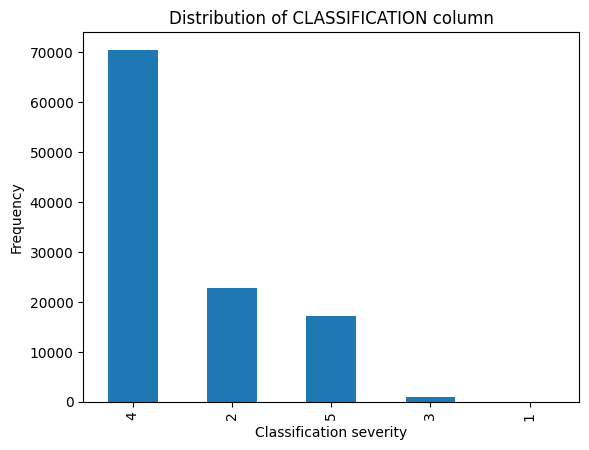

In [ ]:
#visualize distribution of 'CLASSIFICATION' column to see how the frequency of medical severity changes
data['CLASSIFICATION'].value_counts().plot(kind='bar')
plt.title('Distribution of CLASSIFICATION column')
plt.xlabel('Classification severity')
plt.ylabel('Frequency')

In [ ]:
#Find product names that led to highest severity
data_severe = data[data['CLASSIFICATION'] == 5]

# Get the most common product names
most_common_products = data_severe['PRODUCT'].value_counts().head(10)  # Adjust '10' based on how many top products you want

# Print the result
print("Top 10 most common products with CLASSIFICATION = 5:")
print(most_common_products)

Top 10 most common products with CLASSIFICATION = 5:
EXEMPTION 4               16201
KRATOM                      119
RAW OYSTERS                  42
JOHNSONS POWDER NO UPC       39
Kratom                        7
SIMPLY THICK                  7
5-HOUR ENERGY                 6
5 HOUR ENERGY                 5
FISH OIL                      5
OYSTERS                       5
Name: PRODUCT, dtype: int64


In [ ]:
#Find ages that led to 4 severity
data_severe = data[data['CLASSIFICATION'] == 4]

# Get the most common ages with 4 severity
most_common_ages= data_severe['PATIENT_AGE'].value_counts().head(10)  # Adjust '10' based on how many top ages you want

# Print the result
print("Top 10 most common ages  with CLASSIFICATION = 4:")
print(most_common_ages)

Top 10 most common ages  with CLASSIFICATION = 4:
55.0    1508
50.0    1506
53.0    1445
57.0    1442
56.0    1412
54.0    1370
58.0    1360
52.0    1319
60.0    1311
49.0    1280
Name: PATIENT_AGE, dtype: int64


In [ ]:
#Find gender that led to 4 severity
data_severe = data[data['CLASSIFICATION'] == 4]

# Get the most common gender with 4 severity
most_common_sex = data_severe['SEX'].value_counts().head(10)  # Adjust '10' based on how many top ages you want

# Print the result
print("Top 10 most common gender  with CLASSIFICATION = 4:")
print(most_common_sex)

Top 10 most common gender  with CLASSIFICATION = 4:
Female          54590
Male            15888
Unknown            15
Not Reported       14
Name: SEX, dtype: int64


**Modelling**

In [ ]:
#Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# dropping duplicates of rows with the same people
single_people_data = data.drop_duplicates(subset='REPORT_ID', keep='first')

# drop rows where sex is not reported or unknown
single_people_data = single_people_data[~single_people_data['SEX'].isin(['Not Reported', 'Unknown'])]

# convert product codes to numeric and drop non numeric
single_people_data['PRODUCT_CODE'] = pd.to_numeric(single_people_data['PRODUCT_CODE'], errors='coerce')
single_people_data = single_people_data.dropna(subset=['PRODUCT_CODE'])

# my predictor variables
X = single_people_data[['PATIENT_AGE', 'SEX', 'PRODUCT_TYPE', 'PRODUCT_CODE']]

# my response variable
y = single_people_data['CLASSIFICATION']

# one hot encoding the categorical variables of Sex and Product Type so that they are binary
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_data = X[['SEX', 'PRODUCT_TYPE']]
categorical_data_encoded = encoder.fit_transform(categorical_data)

# converting the encoded data into df to combine with other data
categorical_encoded_df = pd.DataFrame(categorical_data_encoded, columns=encoder.get_feature_names_out(['SEX', 'PRODUCT_TYPE']))

# concatenating the newly one-hot encoded categorical features
X_encoded = pd.concat([X[['PATIENT_AGE', 'PRODUCT_CODE']].reset_index(drop=True), categorical_encoded_df.reset_index(drop=True)], axis=1)

# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# applying the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# finding MSE, R^2, and model coefficients and intercepts
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.8128331020496595
R-squared: 0.18576774061306744
Coefficients: [ 0.01034026  0.01874092 -0.18254389  0.44369745]
Intercept: 1.927164371805252


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
categorical_encoded_df

,SEX_Male,PRODUCT_TYPE_SUSPECT
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
64068,1.0,1.0
64069,0.0,1.0
64070,0.0,1.0
64071,0.0,1.0


In [ ]:
single_people_data

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,CLASSIFICATION
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37.0,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,4
5,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29.0,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",4
6,6/29/2023,2023-CFS-006687,6/20/2023,SUSPECT,HUEL BLACK EDITION,37.0,Mult Food Dinner/Grav/Sauce/Special,39.0,year(s),Male,Food poisoning,Other Serious or Important Medical Event,4
7,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54.0,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",5
10,6/29/2023,2023-CFS-006676,6/27/2023,SUSPECT,WATERMELON,20.0,Fruit/Fruit Prod,73.0,year(s),Female,"Diarrhoea, Vomiting",Other Serious or Important Medical Event,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206577,2/26/2003,79988,2/17/2003,SUSPECT,JUST FOR MEN SHAMPOO-IN HAIR COLOR,53.0,Cosmetics,55.0,year(s),Male,"ASTHENIA, BURNING SENSATION, EYE PAIN, SINUS PAIN",Other Outcome,2
206581,2/13/2003,73153,1/23/2003,SUSPECT,TRADER JOE'S CREAM OF SALMON SOUP,38.0,Soup,45.0,year(s),Female,"CHEST PAIN, DIZZINESS, DYSPNOEA, HYPOAESTHESIA...","Required Intervention, Visited Emergency Room",3
206591,12/26/2002,67970,11/5/2002,SUSPECT,CROWN PRINCE SARDINES IN TOMATO SAUCE,16.0,Fishery/Seafood Prod,72.0,year(s),Female,"ABDOMINAL PAIN UPPER, DIARRHOEA, VOMITING","Visited Emergency Room, Visited a Health Care ...",2
206593,6/26/2002,80767,5/24/2002,SUSPECT,XENADRINE RFA-1,54.0,Vit/Min/Prot/Unconv Diet(Human/Animal),50.0,year(s),Female,"CORONARY ARTERY DISSECTION, CORONARY ARTERY EM...","Life Threatening, Hospitalization",4
